In [1]:
import pandas as pd 
import numpy as np

In [2]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

In [3]:
X, y = mnist["data"], mnist["target"]

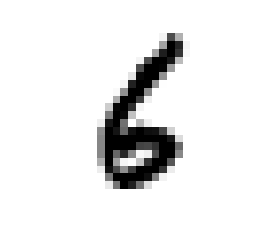

In [4]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
some_digit = X[39000]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,interpolation="nearest")
plt.axis("off")
plt.show()

In [5]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
X_train.shape

(60000, 784)

In [6]:
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [7]:
X_test =pd.read_csv('test.csv').values
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X_train.astype(np.float64))
test_scaled = scaler.fit_transform(X_test.astype(np.float64))

In [8]:
from sklearn.linear_model import SGDClassifier 
sgd_clf = SGDClassifier(random_state=42, max_iter = 5)
sgd_clf.fit(x_scaled, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=5, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [9]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, x_scaled, y_train, cv=3, scoring="accuracy")

array([ 0.91046791,  0.90844542,  0.90978647])

In [10]:
preds = sgd_clf.predict(test_scaled)
preds


array([ 2.,  0.,  9., ...,  3.,  9.,  2.])